In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import networkx as nx

from tqdm import tqdm
import time
import random
%matplotlib widget

In [2]:
from cycler import cycler
import matplotlib as mpl


COLORS = ["#F0A830", "#F07818", "#78C0A8", "#FCEBB6", "#5E412F"]
LINE_CYCLER = cycler(color=COLORS) + cycler(linestyle=["-", ":", "--", "-.", "-"])

mpl.rcParams.update(
    {
        "font.size": 14,
        "legend.fontsize": 14,
        "axes.titlesize": 16,
        "axes.labelsize": 16,
        "axes.labelweight": "bold",
        "axes.titleweight": "bold",
        "lines.linewidth": 3,
        "xtick.direction": "in",
        "ytick.direction": "in",
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "axes.prop_cycle": LINE_CYCLER,
    }
)


In [3]:
Probber = np.array([[0.1,0.4,0.5],
                    [0.3,0.3,0.4],
                    [0.1,0.1,0.8]])

In [4]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(Probber.T)

# Find the left eigenvectors
left_eigenvectors = eigenvectors.T
Rpi = left_eigenvectors[0,:]/sum(left_eigenvectors[0,:])

In [5]:
Rpi

array([0.13513514, 0.17567568, 0.68918919])

# The machinery

In [6]:

a = np.shape(Probber)[0]

def check_win(new_x_cop,new_x_robber):
    """
    Checks if there is a cop win.
    """
    if new_x_cop == new_x_robber:
        # print("COP WIN")
        return True
    return False

def make_move(Pcop,Probber,Xcop,Xrobber):
    """
    Do a timestep, both the cop and the robber will make a move.
    """
    global a
    new_Xcop =np.random.choice(a, p =Pcop[Xcop,:])
    new_Xrobber =np.random.choice(a, p =Probber[Xrobber,:])


    return (new_Xcop,new_Xrobber)


def run_a_bunch(Pcop,Probber,Xcop,Xrobber,N):
    """
    Runs a bunch of simulations with Pcop, Probber. Xcop and Xrobber are the starting positions, N is the amount of runs to bunch.
    """
    bigdata = list()
    
    if not Xcop: #set the xcop randomly if xcop is None.
        new_Xcop = random.choice([0,1,2])
    else:
        new_Xcop = Xcop
        
    if not Xrobber:
        new_Xrobber = random.choice([0,1,2])
    else:
        new_Xrobber = Xrobber
    
    roundcount = 0
    
    for i in range(N):
        
        new_Xcop, new_Xrobber = make_move(Pcop,Probber,new_Xcop,new_Xrobber)
        roundcount += 1
        
        if check_win(new_Xcop,new_Xrobber):
            # print(f"rounds taken: {roundcount}, caught at: {new_Xcop,new_Xrobber}")
            data = {"rounds":roundcount,"caught at":new_Xcop}
            roundcount = 0
            bigdata.append(data)
            
            if not Xcop:
                new_Xcop = random.choice([0,1,2])
            else:
                new_Xcop = Xcop
            if not Xrobber:
                new_Xrobber = random.choice([0,1,2])
            else:
                new_Xrobber = Xrobber
            # return None
    return pd.DataFrame(bigdata)


# Strategy 1, cop stays at argmax
Cop stays at house 3

In [7]:
Pcop = np.array([[0,0,1],
                 [0,0,1],
                 [0,0,1]])
#The cop stays at location 3.

df1 = run_a_bunch(Pcop,Probber, 2, None, 50000)
# df1

In [8]:
f"The expected catching time is: {df1['rounds'].mean()} rounds"

'The expected catching time is: 1.9927065481646806 rounds'

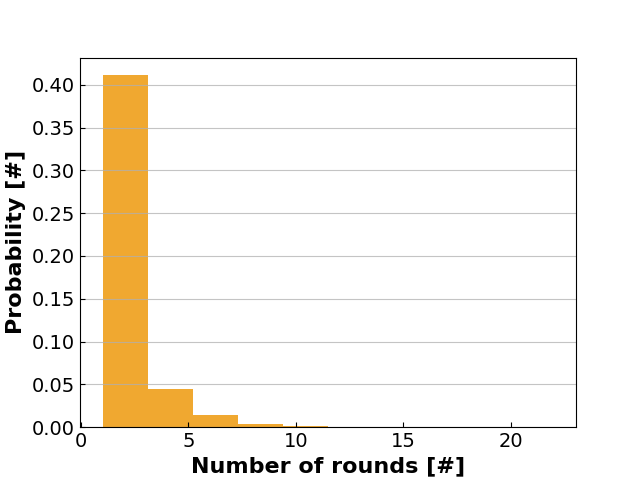

In [11]:
plt.cla()
plt.close()
plt.grid(axis="y", alpha=0.75)
plt.hist(df1["rounds"],density=True)
plt.xlabel("Number of rounds [#]")
plt.ylabel("Probability [#]")
#plt.title("1. Number of rounds until robber caught")
plt.savefig("plots/1 number of rounds untill robber caught.pdf", bbox_inches="tight")
plt.show()

# Strategy 2: Uniform cop chain

In [13]:

# Generate a 3x3 array with all entries being 1/3
Pcop = np.full((3, 3), 1/3)
#The cop is randomly sampling

df2 = run_a_bunch(Pcop,Probber,  None, None, 50000)
# df

In [14]:
f"The expected catching time is: {df2['rounds'].mean()} rounds"

'The expected catching time is: 3.0024620188554616 rounds'

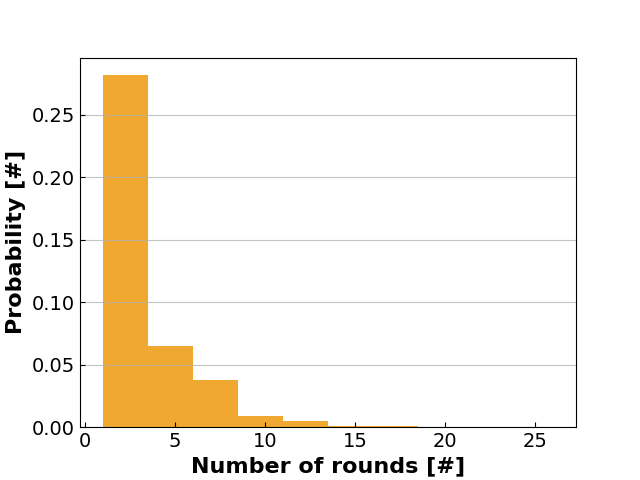

In [15]:
plt.cla()
plt.close()
plt.grid(axis="y", alpha=0.75)
plt.hist(df2["rounds"],density=True)
plt.xlabel("Number of rounds [#]")
plt.ylabel("Probability [#]")
# plt.title("2. Number of rounds until robber caught")
plt.savefig("plots/2 number of rounds untill robber caught.pdf", bbox_inches="tight")
plt.show()

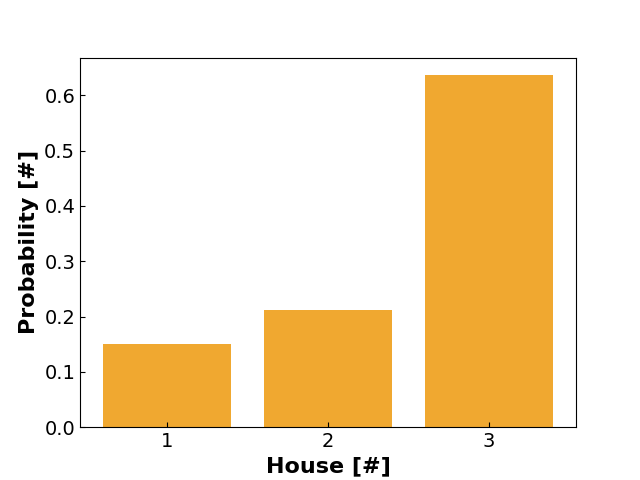

In [17]:
plt.cla()
plt.close()
plt.bar(['1','2','3'],np.histogram(df2["caught at"],bins=3)[0]/np.histogram(df2["caught at"],bins=3)[0].sum())
plt.xlabel("House [#]")
plt.ylabel("Probability [#]")
# plt.title("2. Robber caught location")
plt.savefig("plots/2 robber caught location.pdf", bbox_inches="tight")
plt.show()

# Strategy 3: Pcop = Probber

In [14]:

Pcop = Probber

df3 = run_a_bunch(Pcop,Probber, None, None, 50000)
# df

In [15]:
f"The expected catching time is: {df3['rounds'].mean()} rounds"

'The expected catching time is: 2.46229992612657 rounds'

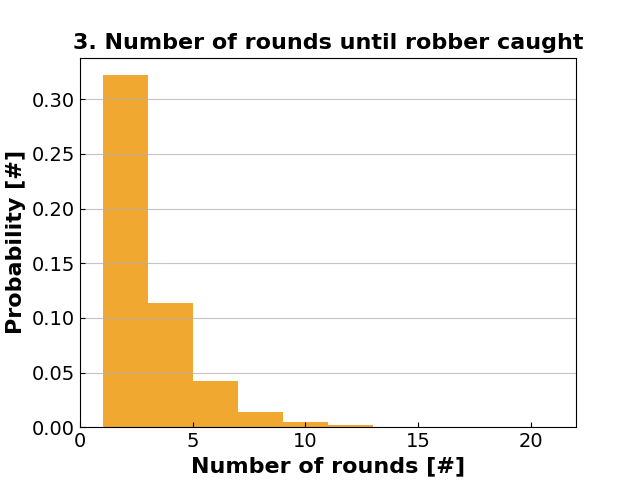

In [26]:
plt.cla()
plt.close()
plt.grid(axis="y", alpha=0.75)
plt.hist(df3["rounds"],density=True)
plt.xlabel("Number of rounds [#]")
plt.ylabel("Probability [#]")
plt.title("3. Number of rounds until robber caught")
plt.show()

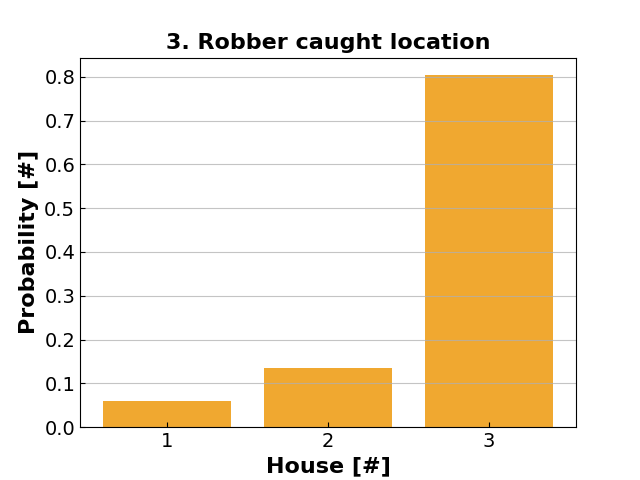

In [27]:
plt.cla()
plt.close()
plt.grid(axis="y", alpha=0.75)
plt.bar(['1','2','3'],np.histogram(df3["caught at"],bins=3)[0]/np.histogram(df3["caught at"],bins=3)[0].sum())
plt.xlabel("House [#]")
plt.ylabel("Probability [#]")
plt.title("3. Robber caught location")
plt.show()

# Strategy 4 Pcop = Rpi
The cop moves according to the stationary distribution of the robber

In [18]:

Pcop = np.vstack((Rpi,Rpi,Rpi))

df4 = run_a_bunch(Pcop,Probber, None, None, 50000)
# df

In [19]:
f"The expected catching time is: {df4['rounds'].mean()} rounds"

'The expected catching time is: 2.211606510969568 rounds'

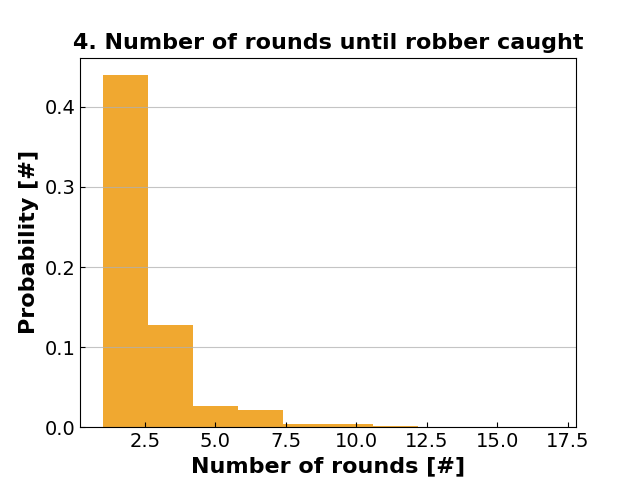

In [30]:
plt.cla()
plt.close()
plt.hist(df4["rounds"],density=True)
plt.grid(axis="y", alpha=0.75)
plt.xlabel("Number of rounds [#]")
plt.ylabel("Probability [#]")
plt.title("4. Number of rounds until robber caught")
plt.show()

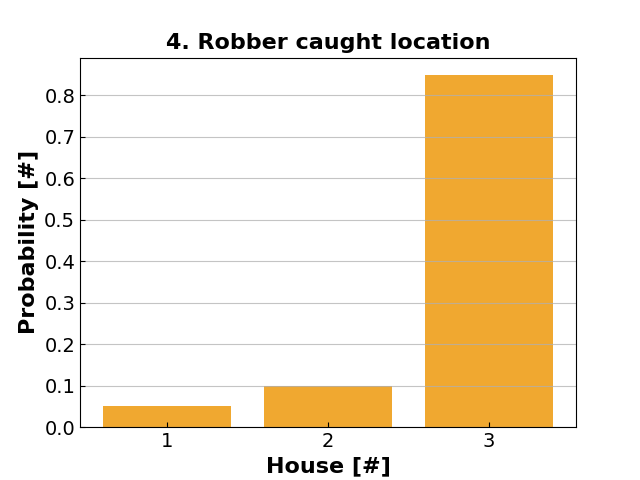

In [29]:
plt.cla()
plt.close()
plt.bar(['1','2','3'],np.histogram(df4["caught at"],bins=3)[0]/np.histogram(df4["caught at"],bins=3)[0].sum())
plt.xlabel("House [#]")
plt.grid(axis="y", alpha=0.75)
plt.ylabel("Probability [#]")
plt.title("4. Robber caught location")
plt.show()

# Strategy, let the computer find the strategy

In [23]:
#iterate over all possible b c e f g h ...

Pcop = np.array([[b,c,1-b-c],
               [e,f,1-e-f,],
               [g,h,1-g-h]])

df4 = run_a_bunch(Pcop,Probber, None, None, 50000)
# df

NameError: name 'b' is not defined